1. Perform Dataset overview , Uni-variate & Bi- variate analysis with chates.
2. Identify outliers, missung values if any.
3. Dervie correlation patterns of each independent variable with dependent variable.
4. Using target variable, identify class imbalance and exlpore methods to handel it. 

In [13]:
import pandas as pd
import numpy as np 

In [4]:
df=pd.read_csv('travel insurance.csv',sep=',')
row,column=df.shape
print("The dataset has {} Rows and {} Columns".format(row,column))

The dataset has 63326 Rows and 11 Columns


In [5]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [58]:
cols=list(df.columns)
continous=list(df._get_numeric_data().columns)
print("Columns : ",cols)
print("Continous Variables   : ",continous)
categorical=list(set(cols)-set(continous))
print("Categorical Variables : ",categorical)

Columns :  ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Gender', 'Age']
Continous Variables   :  ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
Categorical Variables :  ['Agency', 'Destination', 'Distribution Channel', 'Agency Type', 'Claim', 'Product Name', 'Gender']


In [18]:
for i in df.columns:
  a= (len(df[i].unique())/df.shape[0])*100
  print("{} \t => {} %  ".format(i,a))

Agency 	 => 0.025266083441240563 %  
Agency Type 	 => 0.0031582604301550704 %  
Distribution Channel 	 => 0.0031582604301550704 %  
Product Name 	 => 0.04105738559201592 %  
Claim 	 => 0.0031582604301550704 %  
Duration 	 => 0.7185042478602786 %  
Destination 	 => 0.23529040204655274 %  
Net Sales 	 => 1.7986293149733126 %  
Commision (in value) 	 => 1.634399772605249 %  
Gender 	 => 0.004737390645232605 %  
Age 	 => 0.14054258914190065 %  


* ***Agency*** contains the name of agency
* ***Agency Type*** contains the type of travel insurance agencies
* ***Distribution channel*** conatins the distribution channel of travel insurance agencies 
* ***Product Name*** contains the travel insurance products 
* ***Claim*** contains whether insurance claim has been approved or not
* ***Duration*** contains the duration of travel 
* ***Destination*** contains the destination of travel
* ***Net Sales*** contains the amount of sales of travel insurance policies
* ***Commission (in value)*** is the ommission received for travel insurance agency
* ***Gender*** is the gender of the insured person
* ***Age*** is the age of the insured person


In [48]:
df_=df.copy()
df_['Gender']=df_['Gender'].fillna('N')

In [5]:
#number of times a particular values appers in the dateset
for i in categorical:
  print("\nFor column ** "+i+" **")
  print(df[i].value_counts())


For column ** Gender **
M    9347
F    8872
Name: Gender, dtype: int64

For column ** Claim **
No     62399
Yes      927
Name: Claim, dtype: int64

For column ** Agency Type **
Travel Agency    45869
Airlines         17457
Name: Agency Type, dtype: int64

For column ** Distribution Channel **
Online     62219
Offline     1107
Name: Distribution Channel, dtype: int64

For column ** Agency **
EPX    35119
CWT     8580
C2B     8267
JZI     6329
SSI     1056
JWT      749
RAB      725
LWC      689
TST      528
KML      392
ART      331
CCR      194
CBH      101
TTW       98
CSR       86
ADM       82
Name: Agency, dtype: int64

For column ** Destination **
SINGAPORE     13255
MALAYSIA       5930
THAILAND       5894
CHINA          4796
AUSTRALIA      3694
              ...  
BENIN             1
TIBET             1
URUGUAY           1
ALBANIA           1
SEYCHELLES        1
Name: Destination, Length: 149, dtype: int64

For column ** Product Name **
Cancellation Plan                       1863

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5150eae748>,
      dtype=object)

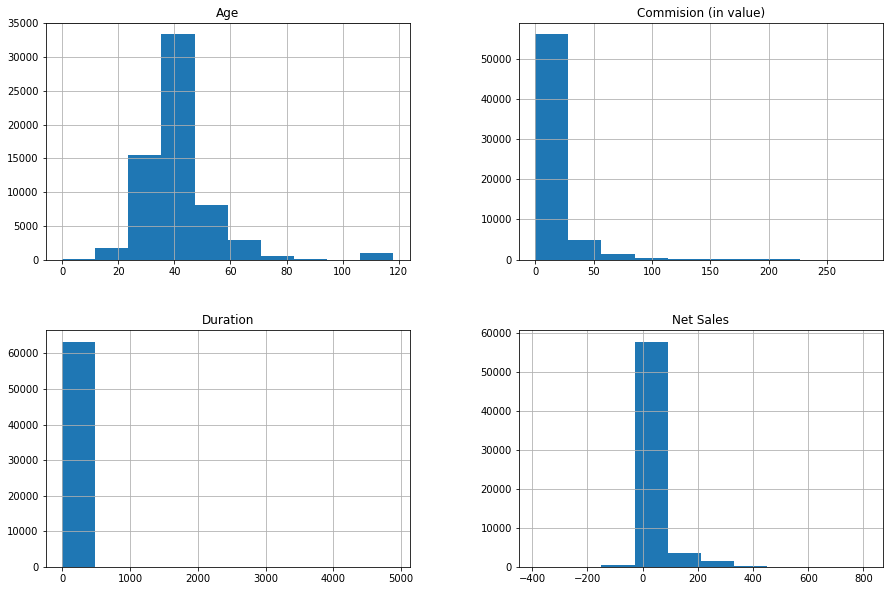

In [ ]:
df.hist(figsize=[15,10])

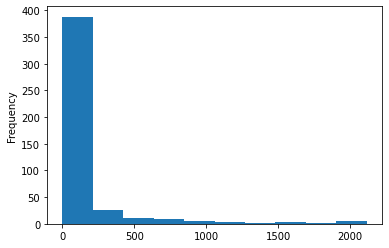

In [79]:
df['Duration'].value_counts().plot.hist()

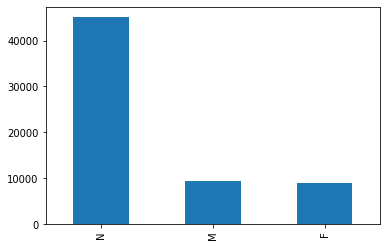

In [75]:
df_['Gender'].value_counts().plot(kind='bar')
# plot show that there are approximately equal number of Male and Female 
# Dataset contains very large amount of Null Value herein reperesented as N  

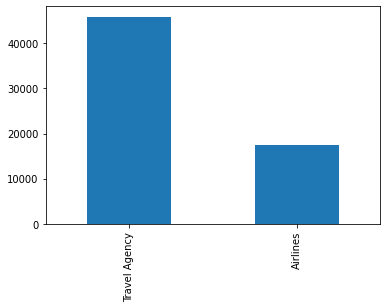

In [ ]:
df['Agency Type'].value_counts().plot.bar()
#There are more than double number of Travel Agency as compared to Airlines 
# which shows that people prefer travel agency more than airlines 

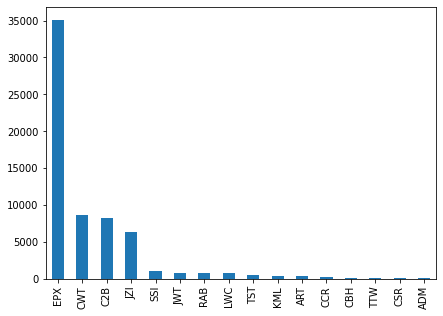

In [ ]:
df['Agency'].value_counts().plot.bar(figsize=[7,5])

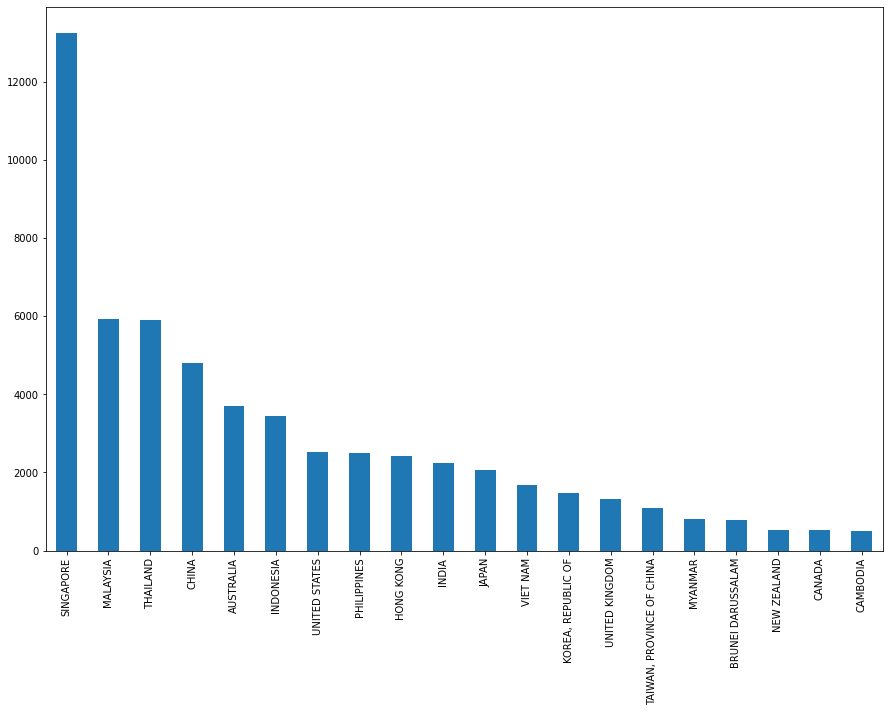

In [ ]:
'''
counts = df['Destination'].value_counts().keys().tolist()
print(counts)
'''
d=df['Destination'].value_counts()[:20]
d.plot.bar(figsize=[15,10])

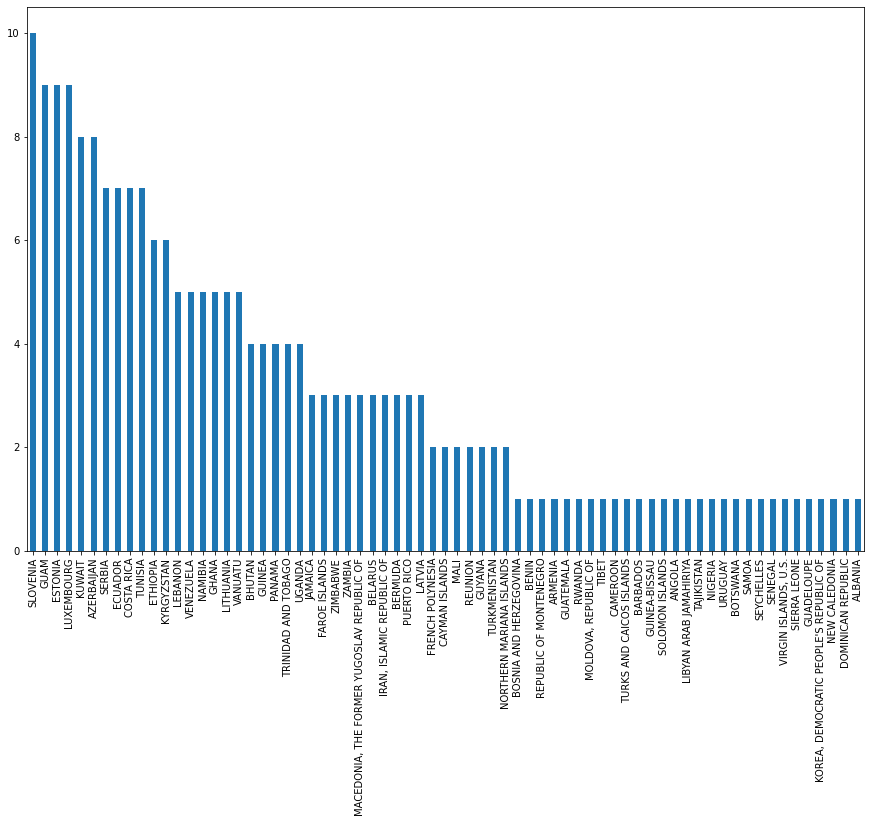

In [ ]:
d=df['Destination'].value_counts()[80:]
d.plot.bar(figsize=[15,10])

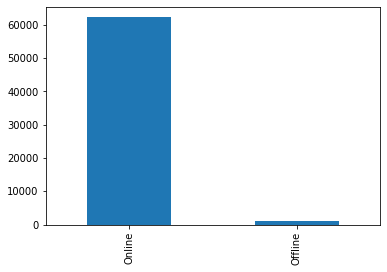

In [ ]:
df['Distribution Channel'].value_counts().plot.bar()

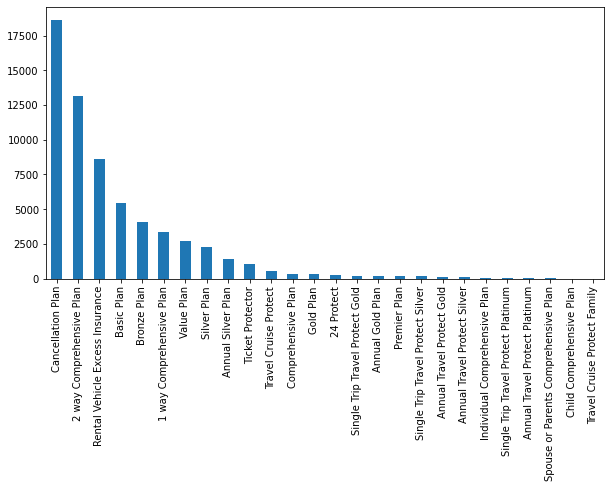

In [ ]:
df['Product Name'].value_counts().plot.bar(figsize=[10,5])

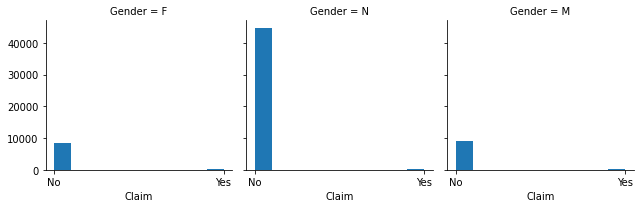

In [31]:
import seaborn as sns
from matplotlib import pyplot as plt
fg = sns.FacetGrid(df_, col="Gender")
fg.map(plt.hist, 'Claim')


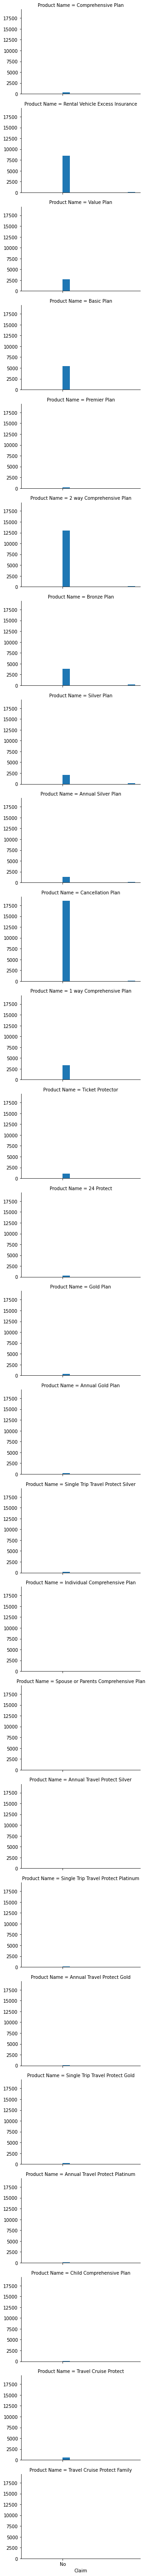

In [110]:
fg=sns.FacetGrid(df,row="Product Name",height=3,aspect=1.5)
fg=fg.map(plt.hist,"Claim")
# out of all the Products cancellation plan has the highest number of records 
# out of all the products Silver plan has the highest approved calims 
# Cancellation , Silver, Annual Silver, Bronze, 2 way comprehensive and rental vehicle excess insurance are the ones which have some with approved claims
# Individual Comprehensive, Spouse or parent Comprehensive, Annual travel protect silver don't have any entry in the dataset

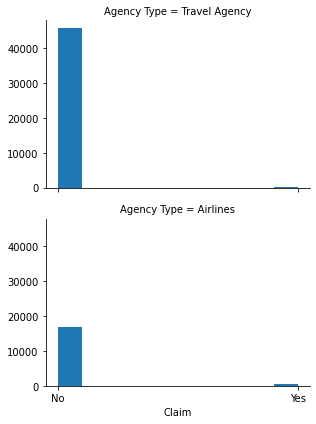

In [102]:
fg =sns.FacetGrid(df,row="Agency Type",height=3,aspect=1.5)
fg = fg.map(plt.hist,"Claim")
#Airlines are accepted more in comparision of Travel agency 

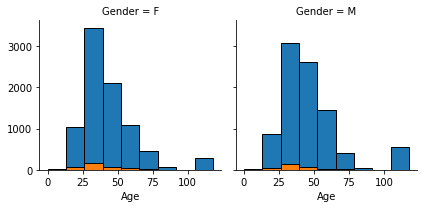

In [42]:
bins = np.linspace(df.Age.min(), df.Age.max(),10)
fg = sns.FacetGrid(df, col='Gender',hue='Claim', col_wrap=2)
fg.map(plt.hist, 'Age', bins=bins, ec='k')
# Female's age with approved claim ranges from 15 to 60, with highest at 25-35 age 
# Male's age with approved calin ranges from  15 to 50, wtih highest ar 25-30 age
# Both male and female with age >100 has no approved claim ( this value may be an outlier)

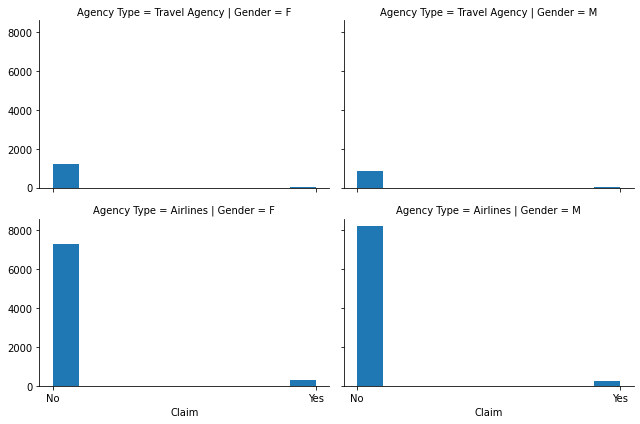

In [43]:
fg =sns.FacetGrid(df,row="Agency Type",col="Gender",height=3,aspect=1.5)
fg = fg.map(plt.hist,"Claim")

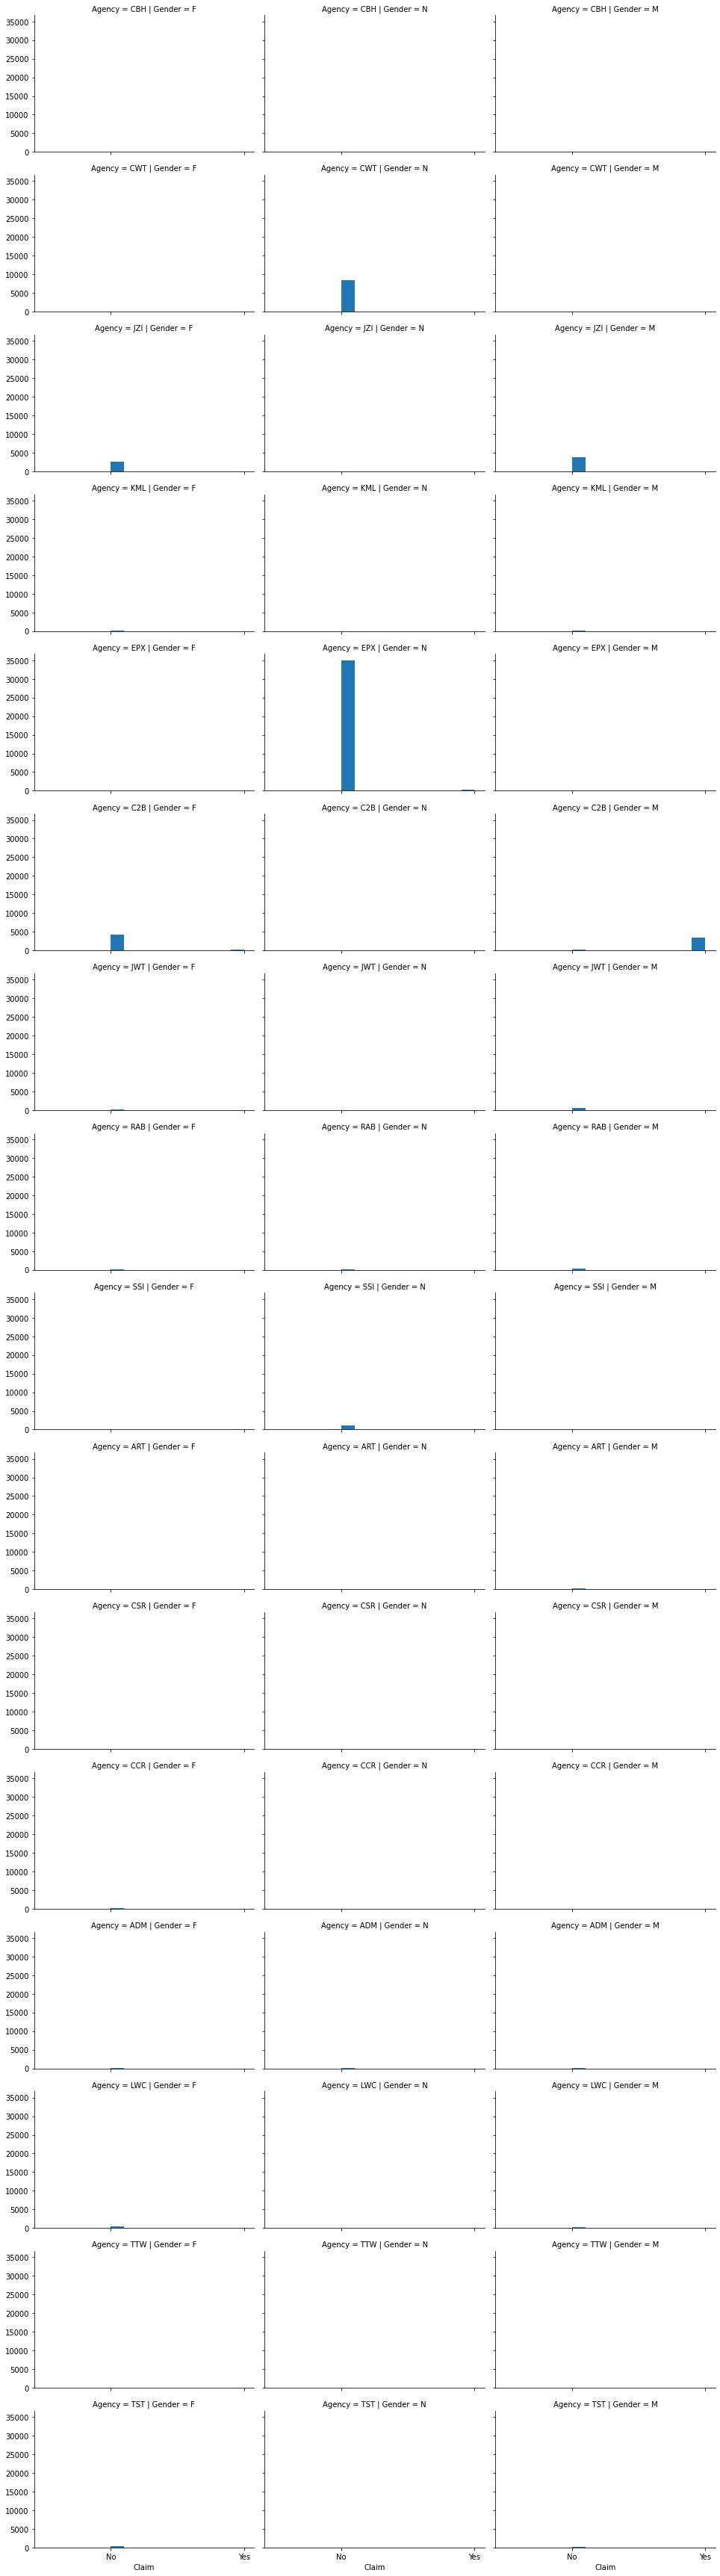

In [47]:
fg =sns.FacetGrid(df_,row="Agency",col="Gender",height=3,aspect=1.5)
fg = fg.map(plt.hist,"Claim")
# males has more approved calim compared with females in C2B agency.

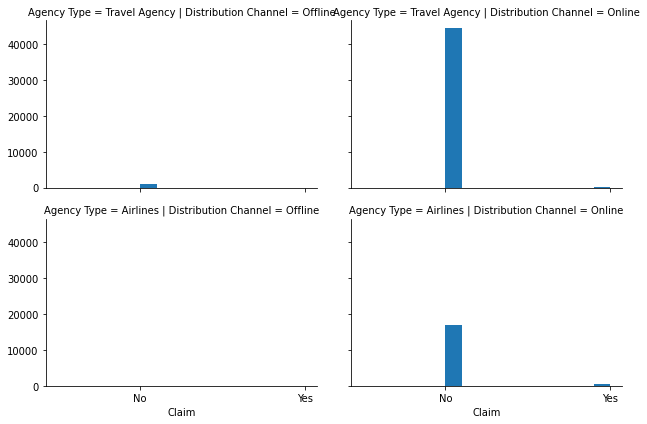

In [38]:
fg =sns.FacetGrid(df,row="Agency Type",col="Distribution Channel",height=3,aspect=1.5)
fg = fg.map(plt.hist,"Claim")
#1 Airlines don't have any Offline distribution channel
#2 All the Travel agency with Offline channel are rejected or not filed the claim
#3 Travel agency with Online channel has some approved claim but majority are still rejected
#4 Airliens with online channel has more approved cases compared to Travel-Online.

In [45]:
df_claim = df[df["Claim"]=="Yes"]

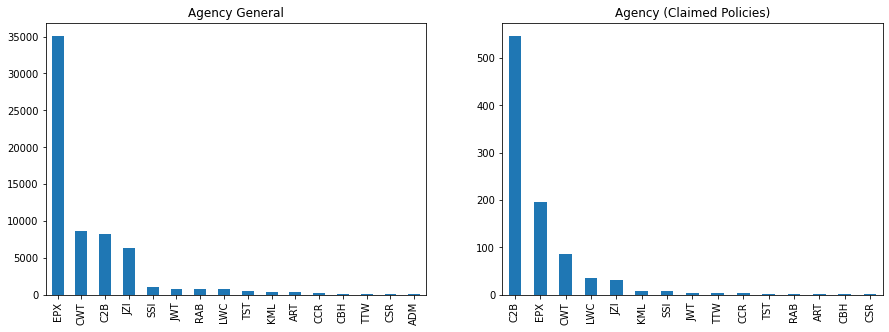

In [46]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(15,5)
axes[0].set_title('Agency General')
axes[1].set_title('Agency (Claimed)')
df['Agency'].value_counts().plot.bar(ax=axes[0])
df_claim['Agency'].value_counts().plot.bar(ax=axes[1])

# EPX has the maximum number of records in the dataset 
# C2B has the maximum approved claim

In [99]:
print(df['Gender'].value_counts())
print(df.isnull().sum())

M    9347
F    8872
Name: Gender, dtype: int64
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64


In [46]:
for i in categorical:
  print(i+"\t",len(df[i].unique()))

Gender	 3
Claim	 2
Agency Type	 2
Distribution Channel	 2
Agency	 16
Product Name	 26
Destination	 149


In [47]:
for i in continous:
  print(i+"\t",len(df[i].unique()))

Duration	 455
Net Sales	 1139
Commision (in value)	 1035
Age	 89


In [ ]:
#since age has less number of unique values in the dataset, so it is better to treat it as categorical variable

In [68]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


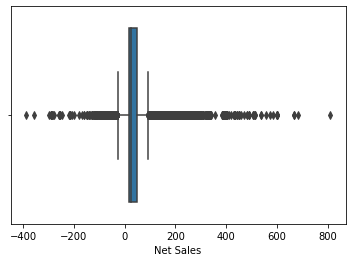

In [9]:
import seaborn as sns
sns.boxplot(x=df['Net Sales'])

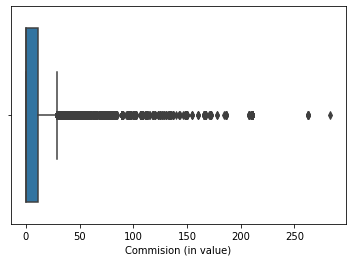

In [10]:
sns.boxplot(x=df['Commision (in value)'])

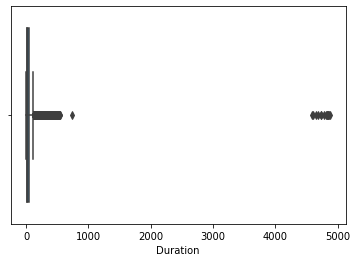

In [11]:
sns.boxplot(x=df['Duration'])

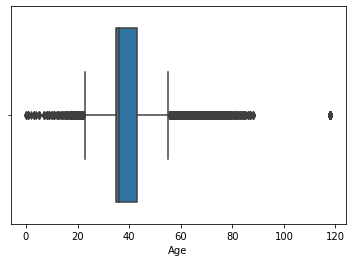

In [22]:
sns.boxplot(x=df['Age'])

In [21]:
import numpy as np

for i in continous:
  print(i,"\t=> " ,df[i].skew())
  '''
for i in continous:
  Q1=df[i].quantile(0.01) #bottom 1 percentile
  Q3=df[i].quantile(0.98) #above 98 percentile
  df[i] = np.where(df[i] < Q1,Q1,df[i])
  df[i] = np.where(df[i] > Q3, Q3,df[i])
print("\n------------Skew After Perfroming Quantile based capping-------------\n")
for i in continous:
  print(i,"\t=> " ,df[i].skew())
  '''


Duration 	=>  23.179616864234475
Net Sales 	=>  3.272372822599944
Commision (in value) 	=>  4.032268514691959
Age 	=>  2.987709841829195


In [22]:
df.skew()

Duration                23.179617
Net Sales                3.272373
Commision (in value)     4.032269
Age                      2.987710
dtype: float64

In [59]:
# High skew of Duration indicates that it is a categorical varible 
for i in ['Duration','Age']:
  categorical.append(i)
  continous.remove(i)
print("Continous Variables   : ",continous)
print("Categorical Variables : ",categorical)

Continous Variables   :  ['Net Sales', 'Commision (in value)']
Categorical Variables :  ['Agency', 'Destination', 'Distribution Channel', 'Agency Type', 'Claim', 'Product Name', 'Gender', 'Duration', 'Age']


In [60]:
df_.groupby(['Gender'])['Claim'].value_counts()

Gender  Claim
F       No        8526
        Yes        346
M       No        9054
        Yes        293
N       No       44819
        Yes        288
Name: Claim, dtype: int64

In [85]:

#print((df['Gender'].isnull().sum()/df.shape[0])*100)
#Since gender has more than 71% missing values 
#so we can drop the column
#df=df.drop(columns=['Gender'])

71.22982661150239


In [64]:
#since age has values >118 it is an outlier so we'll delete it 
# there are some values <=0 in duration which is not possible so we'll delete them too
df_ = df_[df_.Age != 118]
df_ = df_[df_.Duration >=0]

In [68]:
row,column=df_.shape
print("Now the dataset  has {} Rows and {} Columns".format(row,column))
print("%d records deleted from the dataset"%(df.shape[0]-row))

Now the dataset  has 62342 Rows and 11 Columns
984 records deleted from the dataset


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
encoded_df=pd.DataFrame()
for i in categorical:
  encoded_df[i]=le.fit_transform(df_[i])
encoded_df.head()

,Agency,Destination,Distribution Channel,Agency Type,Claim,Product Name,Gender
0,3,79,0,1,0,12,0
1,3,79,0,1,0,12,0
2,6,4,1,1,0,16,2
3,6,4,1,1,0,16,2
4,6,61,1,1,0,16,2


In [ ]:
ll=list()
for l in categorical:
  #print(l)
  aa=df_[l].unique()
  #print(aa)
  d=list()
  for i in aa:
    a=df_[l] == i
    for j in range(0,len(a)):
      if(a[j]== True):
        d.append(j)
        break
  ll.append(d)

In [ ]:
co=0
rltn=list()
for l in categorical:
  a=ll[co]
  #print(a)
  co+=1
  val=df_.loc[a][l].to_list()
  key=encoded_df.loc[a][l].to_list()
  dic=dict(zip(key,val))
  rltn.append(dic)
  print(dic)

{3: 'CBH', 6: 'CWT', 9: 'JZI', 10: 'KML', 7: 'EPX', 2: 'C2B', 8: 'JWT', 12: 'RAB', 13: 'SSI', 1: 'ART', 5: 'CSR', 4: 'CCR', 0: 'ADM', 11: 'LWC', 15: 'TTW', 14: 'TST'}
{1: 'Travel Agency', 0: 'Airlines'}
{0: 'Offline', 1: 'Online'}
{12: 'Comprehensive Plan', 16: 'Rental Vehicle Excess Insurance', 25: 'Value Plan', 8: 'Basic Plan', 15: 'Premier Plan', 1: '2 way Comprehensive Plan', 9: 'Bronze Plan', 17: 'Silver Plan', 4: 'Annual Silver Plan', 10: 'Cancellation Plan', 0: '1 way Comprehensive Plan', 22: 'Ticket Protector', 2: '24 Protect', 13: 'Gold Plan', 3: 'Annual Gold Plan', 20: 'Single Trip Travel Protect Silver', 14: 'Individual Comprehensive Plan', 21: 'Spouse or Parents Comprehensive Plan', 7: 'Annual Travel Protect Silver', 19: 'Single Trip Travel Protect Platinum', 5: 'Annual Travel Protect Gold', 18: 'Single Trip Travel Protect Gold', 6: 'Annual Travel Protect Platinum', 11: 'Child Comprehensive Plan', 23: 'Travel Cruise Protect', 24: 'Travel Cruise Protect Family'}
{79: 'MALAYS

In [70]:
corr = encoded_df.corr()
corr.head()

,Agency,Destination,Distribution Channel,Agency Type,Claim,Product Name,Gender
Agency,1.000000,-0.208348,-0.191928,0.207529,-0.121685,0.138890,0.228212
Destination,-0.208348,1.000000,-0.052289,-0.150909,0.047105,-0.069257,-0.153557
Distribution Channel,-0.191928,-0.052289,1.000000,-0.076895,-0.000798,-0.155318,0.197634
Agency Type,0.207529,-0.150909,-0.076895,1.000000,-0.098706,-0.272308,0.793093
Claim,-0.121685,0.047105,-0.000798,-0.098706,1.000000,0.000679,-0.106780


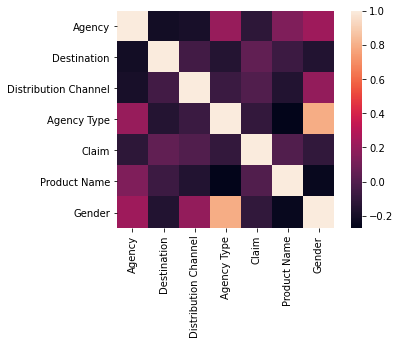

In [71]:
sns.heatmap(corr, square=True)
# Agency Type and Gender has the strongest correlation 

In [ ]:
print(df['Claim'].value_counts())
lbl_1,lbl_0 = df['Claim'].value_counts()
print("Label No class : "+str((lbl_1*100)/df['Claim'].count())+" %")
print("Label Yes class : "+str((lbl_0*100)/df['Claim'].count())+" %")

No     62399
Yes      927
Name: Claim, dtype: int64
Label No class : 98.53614629062312 %
Label Yes class : 1.4638537093768753 %


1. Do feature Engg again , handle outliers accordingly based on bi-varia plots (Outlier)
2. Imputation (Missing Values) - Try both with Gender imputed as(X or Y) and gender removed in modeling process
3. OHE & Label Encode
4. Models - Logistic & Decision & Random Forest - Optimize hyperparameter tuning (Gridsearch , or manual observation)
5. Obtain Accuracy , Precision ,Recall , AUROC

In [73]:
y=encoded_df['Claim']
X=encoded_df.copy()

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)